# Lab 2 - Exploring and manipulating data. 
Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

In [1]:
# imports

from pathlib import Path

import pandas as pd

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [13]:
# Load Howell.csv from the same folder as this file
data_path: Path = Path("Howell.csv")
howell_full: pd.DataFrame = pd.read_csv(data_path, sep=';')

### Quick look at distributions:

In [14]:
print(howell_full.keys())

print()
howell_full.head(n=10)
#data_frame.tail(n=5)
howell_full.info()
howell_full.tail(n=5)

Index(['height', 'weight', 'age', 'male'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


,height,weight,age,male
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1
543,158.750,52.531624,68.0,1


### Clean the data

The data is not being read into a data frame as numerical

In [15]:
print(howell_full.dtypes)
print(howell_full.head())

height    float64
weight    float64
age       float64
male        int64
dtype: object
    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0


### Quick Visualization

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'male'}>]], dtype=object)

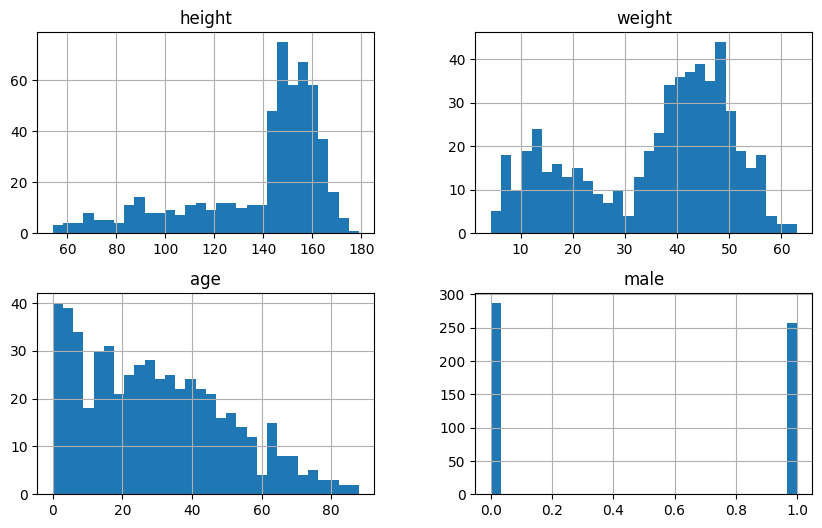

In [16]:
howell_full.hist(bins=30, figsize=(10,6))

### A Better Plot

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [17]:
# create a new feature with the name new
howell_full["new"] = howell_full["male"] + howell_full["age"]
howell_full.info()

# get rid of the new feature
howell_full.drop(axis="columns", labels="new", inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis="index", how="any", inplace=True)

height_median = howell_full["height"].median()
weight_average = howell_full["weight"].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full["height"].fillna(height_median, inplace=True)
howell_full["weight"].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

C:\Users\james\AppData\Local\Temp\ipykernel_20352\2621319004.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full["height"].fillna(height_median, inplace=True)
C:\Users\james\AppData\Local\Temp\ipykernel_20352\2621319004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### Adding a New Feature

### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

### Splitting the Data by Age

### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

### Train/Test Data Split

### Stratified Test/Train Data Split